R Exam - Aida Pinacho 

* Load the files GDP.csv and HDI.csv using read.csv()

In [2]:
GDP <- read.csv('GDP.csv', sep = ",")
HDI <- read.csv('HDI.csv', sep =",")

* Analyze the file that you have just loaded with head() and str()

In [3]:
"Gross domestic product"
head(GDP)
str(GDP)

"HUman development index"
head(HDI)
str(HDI)

[1] "Gross domestic product"

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


[1] "HUman development index"

,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


* Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order()

In [5]:
sort_GDP <- GDP[order(GDP$Province), ]
sort_HDI <- HDI[order(HDI$Province), ]

joined_DATA <- cbind(sort_GDP, sort_HDI)

head(joined_DATA)

,Province,GDP.per.capita,CCAA,Province,HDI
,<chr>,<dbl>,<chr>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,Albacete,17.864,Castilla-La Mancha,Albacete,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,Almería,20.873,Andalucía y Extremadura,Almería,0.915
12,Asturias,21.634,Asturias y Cantabria,Asturias,0.956
16,Ávila,18.382,Castilla y León,Ávila,0.952


* The new data frame will contain two columns names "Province". remove one of the columns

In [6]:
final_data <- subset(joined_DATA, select = -c(4))

* Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province GDP.per.capita, CCAA and HDI. With each province matching its CCAA. (Fig, 1)

In [7]:
head(final_data)
tail(final_data)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


* Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point)

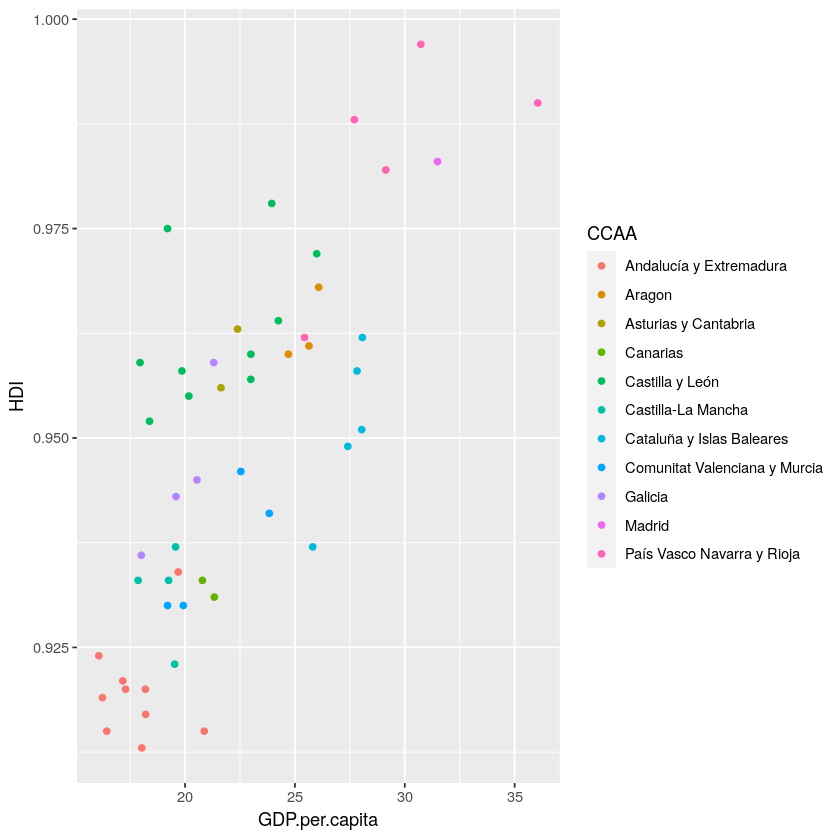

In [9]:
library("ggplot2")

ggplot(final_data, aes(x = GDP.per.capita, y = HDI, colour=CCAA)) + geom_point()

* Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)

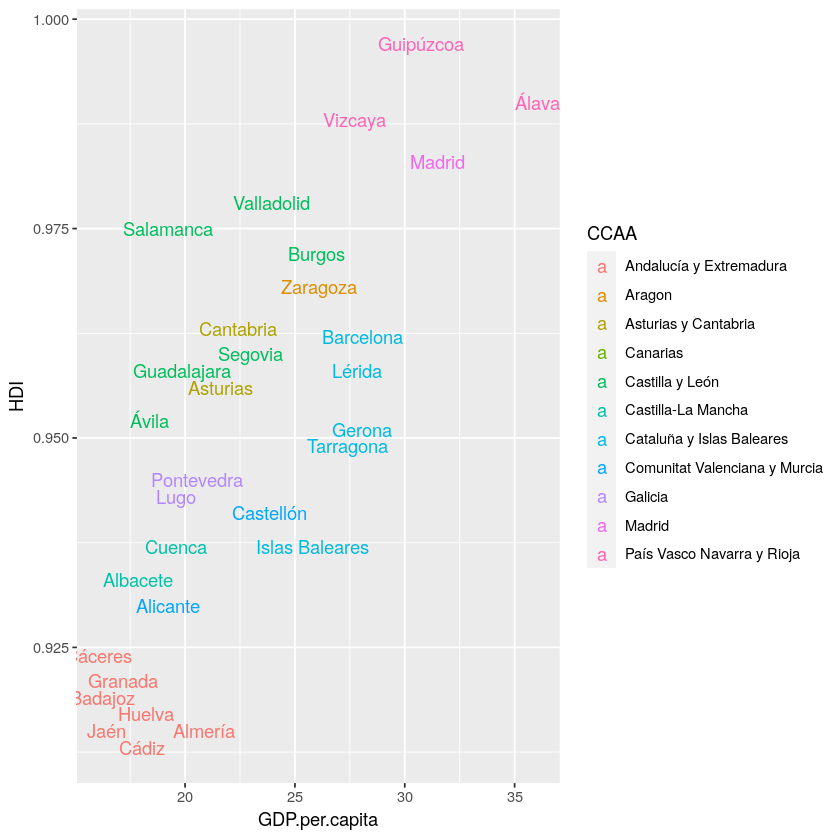

In [10]:
ggplot(final_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_text(aes(label=Province), check_overlap=TRUE)

* Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().

In [15]:
means_GDP <- aggregate(x = final_data$GDP.per.capita, by = list(final_data$CCAA), FUN = mean)
std_GDP <- aggregate(x = final_data$GDP.per.capita, by = list(final_data$CCAA), FUN = sd)
means_HDI <- aggregate(x = final_data$HDI, by = list(final_data$CCAA), FUN = mean)
std_HDI <- aggregate(x = final_data$HDI, by = list(final_data$CCAA), FUN = sd)


colnames(means_GDP) <- c("CCAA", "means_GDP")
colnames(std_GDP) <- c("CCAA", "std_GDP")
colnames(means_HDI) <- c("CCAA", "means_HDI")
colnames(std_HDI) <- c("CCAA", "std_HDI")

means_GDP
std_GDP
means_HDI
std_HDI


CCAA,means_GDP
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


CCAA,std_GDP
<chr>,<dbl>
Andalucía y Extremadura,1.5391112
Aragon,0.7045824
Asturias y Cantabria,0.5345727
Canarias,0.3839590
Castilla y León,2.7926986
Castilla-La Mancha,0.8047768
Cataluña y Islas Baleares,0.9434594
Comunitat Valenciana y Murcia,2.1781260
Galicia,1.4205488


CCAA,means_HDI
<chr>,<dbl>
Andalucía y Extremadura,0.91980
Aragon,0.96300
Asturias y Cantabria,0.95950
Canarias,0.93200
Castilla y León,0.96300
Castilla-La Mancha,0.93150
Cataluña y Islas Baleares,0.95140
Comunitat Valenciana y Murcia,0.93675
Galicia,0.94575


CCAA,std_HDI
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


* Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI

In [21]:
CCAA <- means_GDP["CCAA"]
GDP_mean <- means_GDP["means_GDP"]
HDI_mean <- means_HDI["means_HDI"]
GDP_std <- std_GDP["std_GDP"]
HDI_std <- std_HDI["std_HDI"]


Means_and_std_table <- data.frame(CCAA, GDP_mean, HDI_mean, GDP_std, HDI_std)


colnames(Means_and_std_table) <- c("CCAA","GDP_mean","HDI_mean","std_GDP","std_HDI")

Means_and_std_table

CCAA,GDP_mean,HDI_mean,std_GDP,std_HDI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


* Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)

In [22]:
Means_and_std_table[is.na(Means_and_std_table)] <- 0
Means_and_std_table

CCAA,GDP_mean,HDI_mean,std_GDP,std_HDI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


* Plot again the original scatterplot with geom_point and color by CCAA. 

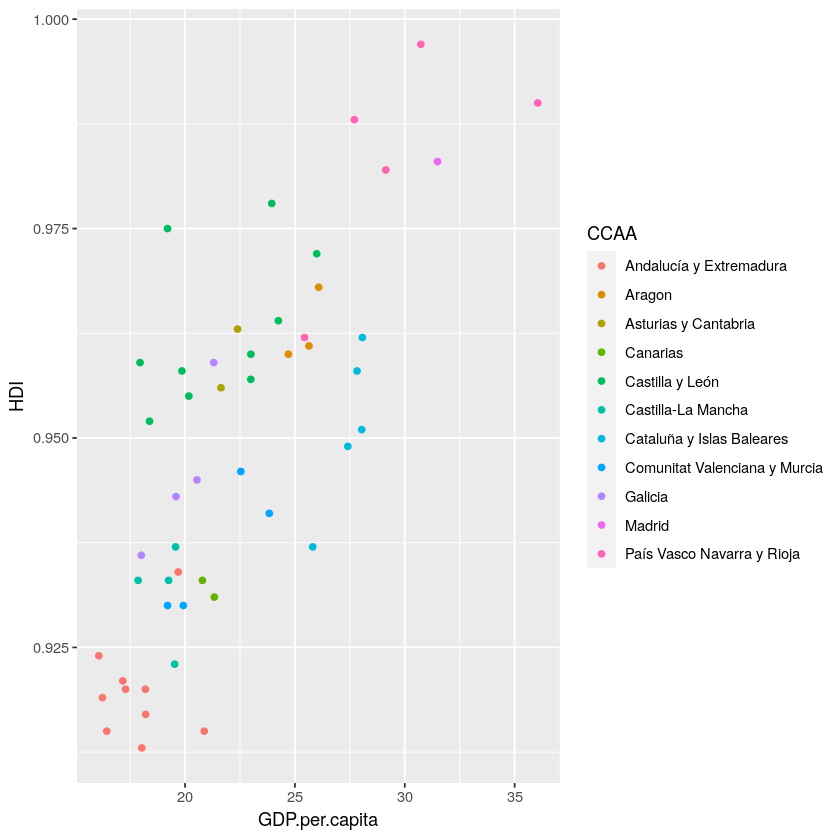

In [23]:
ggplot(final_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

* Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 

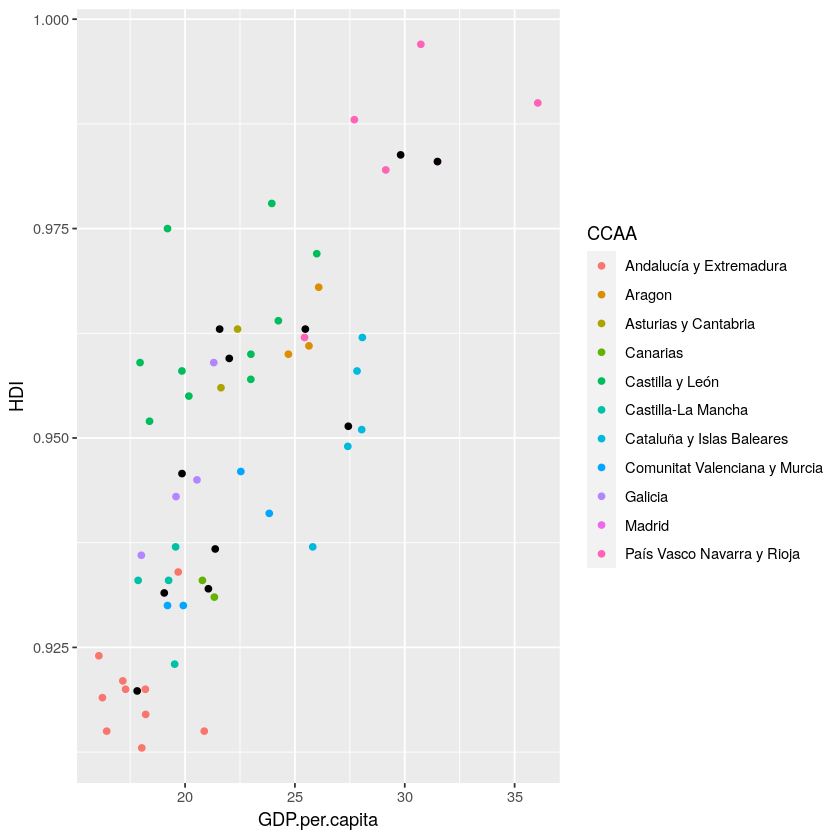

In [26]:
ggplot() + 
geom_point(data=final_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=Means_and_std_table, aes(x= GDP_mean, y= HDI_mean))


* Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.

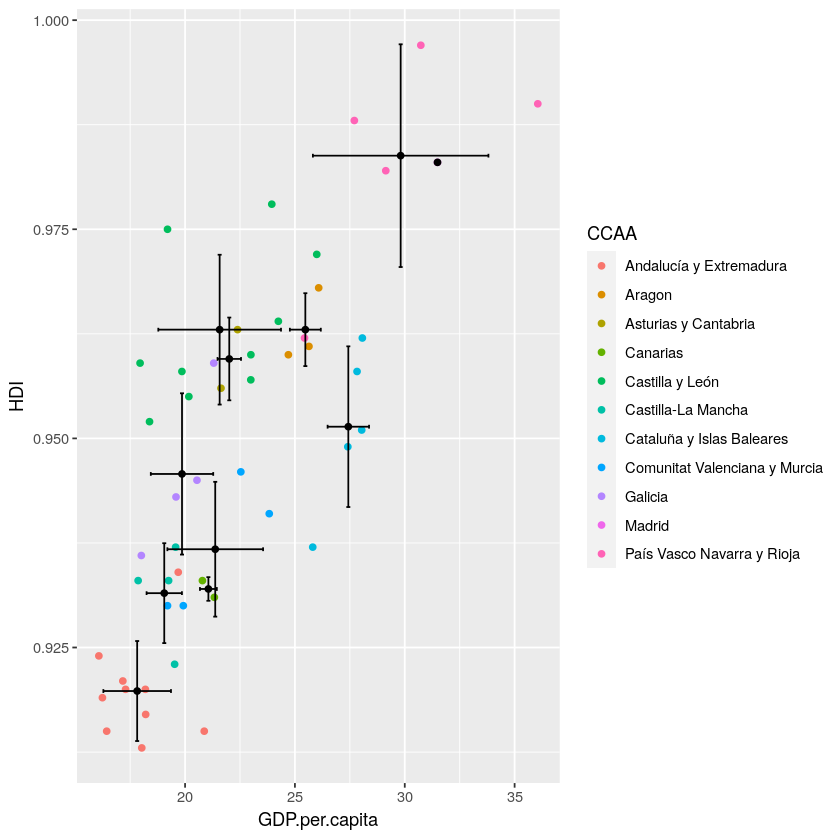

In [29]:
ggplot() + 
geom_point(data=final_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=Means_and_std_table, aes(x= GDP_mean, y= HDI_mean)) +
geom_errorbar(data=Means_and_std_table, aes(x=GDP_mean, y=HDI_mean, ymin=HDI_mean - std_HDI, ymax=HDI_mean + std_HDI)) +
geom_errorbarh(data=Means_and_std_table, aes(y=HDI_mean, xmin=GDP_mean-std_GDP, xmax=GDP_mean +std_GDP))


* Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)

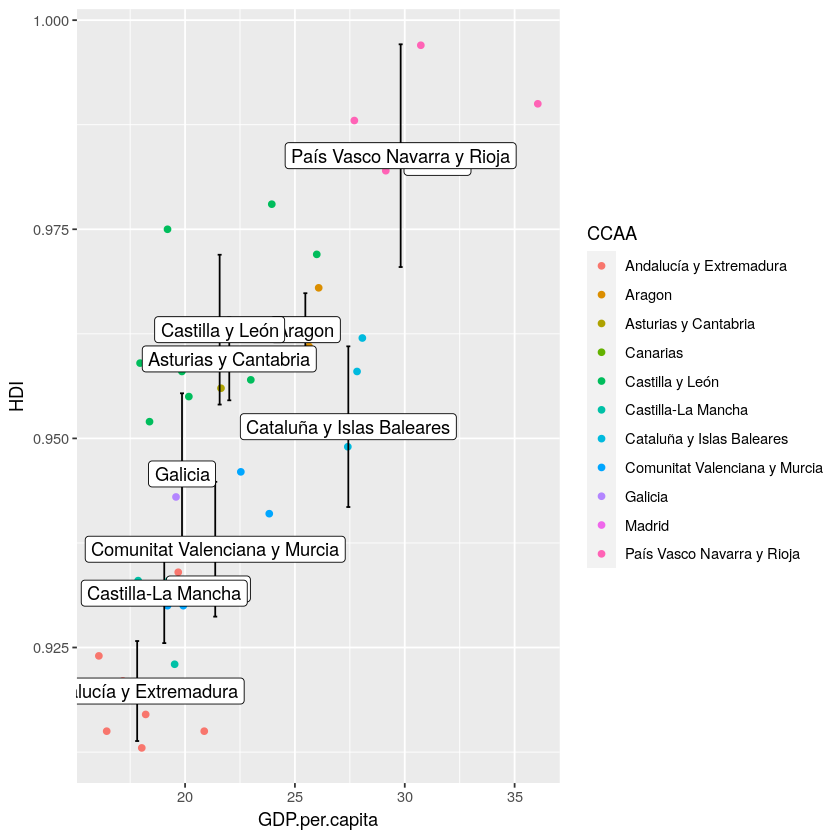

In [33]:
ggplot() + 
geom_point(data=final_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=Means_and_std_table, aes(x= GDP_mean, y= HDI_mean)) +
geom_errorbar(data=Means_and_std_table, aes(x=GDP_mean, y=HDI_mean, ymin=HDI_mean - std_HDI, ymax=HDI_mean + std_HDI)) +
geom_errorbarh(data=Means_and_std_table, aes(y=HDI_mean, xmin=GDP_mean-std_GDP, xmax=GDP_mean +std_GDP)) +
geom_label(data = Means_and_std_table, aes(x=GDP_mean, y=HDI_mean,label=CCAA))